# Create novel NeuroML models from components on NeuroML-DB

This notebook demonstrates how to access the [NeuroML-DB database](https://neuroml-db.org), extract elements in NeuroML format and use them to create new models

In [1]:
from pyneuroml import pynml
import urllib.request, json 
import requests
import os

## 1) Search for, download and analyse channels accessed via the NeuroML-DB API

### 1.1) Search in the database for a particular type of channel


In [2]:
types = {'cell':'NMLCL','channel':'NMLCH'}

# Helper method for search
def search_neuromldb(search_term, type=None):
    
    with urllib.request.urlopen('https://neuroml-db.org/api/search?q=%s' % search_term.replace(' ','%20')) as url:
        data = json.load(url)

    for l in data:
        if type!=None:
            for type_ in types:
                if type==type_ and not types[type_] in l['Model_ID']:
                    data.remove(l)
        if l in data:
            print('%s: %s, %s %s %s'%(l['Model_ID'],l['Name'],l['First_Author'],l['Second_Author'],l['Publication_Year']))
        
    return data

data = search_neuromldb("Fast Sodium", 'channel')

NMLCH000023: NaF Inactivating Fast Sodium, Maex De Schutter 1998
NMLCH001490: NaTs Fast Inactivating Sodium, Gouwens Berg 2018
NMLCH001398: NaTa Fast Inactivating Sodium, Hay Hill 2011
NMLCH000171: NaF Fast Transient Inactivating Sodium, Traub Contreras 2005
NMLCH000170: NaF Fast Transient Inactivating Sodium, Traub Contreras 2005
NMLCH000169: NaF Fast Transient Inactivating Sodium, Traub Contreras 2005
NMLCH000168: NaF Fast Transient Inactivating Sodium, Traub Contreras 2005
NMLCH000167: NaF Fast Transient Inactivating Sodium, Traub Contreras 2005
NMLCH000166: NaF Fast Transient Inactivating Sodium, Traub Contreras 2005
NMLCH000165: NaF Fast Transient Inactivating Sodium, Traub Contreras 2005
NMLCH000164: NaP Persistent Noninactivating Sodium, Traub Buhl 2003
NMLCH000163: NaF Fast Transient Inactivating Sodium, Traub Contreras 2005
NMLCH000162: NaF Fast Transient Inactivating Sodium, Traub Contreras 2005
NMLCH000161: NaF Fast Transient Inactivating Sodium, Traub Contreras 2005
NMLCH00

### 1.2) Select one of these results and download it, and browse the contents

In [3]:
# Helper method to retrieve a NeuroML file based on modelID
def get_model_from_neuromldb(model_id, type):
  
    fname = '%s.%s.nml'%(model_id, type)

    url = 'https://neuroml-db.org/render_xml_file?modelID=%s'%model_id
    r = requests.get(url)
    with open(fname , 'wb') as f:
        f.write(r.content)

    return pynml.read_neuroml2_file(fname), fname


# Choose one of the channels
chan_model_id = 'NMLCH001398'

na_chan_doc, na_chan_fname_orig = get_model_from_neuromldb(chan_model_id, 'channel')

na_chan = na_chan_doc.ion_channel[0] # select the first/only ion channel in the nml doc

na_chan_fname = '%s.channel.nml'%na_chan.id
os.rename(na_chan_fname_orig, na_chan_fname) # Rename for clarity

print('Channel %s (in file %s) has notes: %s'%(na_chan.id, na_chan_fname, na_chan.notes))

pyNeuroML >>> INFO - Loading NeuroML2 file: NMLCH001398.channel.nml


Channel NaTa_t (in file NaTa_t.channel.nml) has notes: Fast inactivating Na+ current
            
Comment from original mod file: 
:Reference :Colbert and Pan 2002


### 1.3) Plot the time course and steady state of this channel

pyNeuroML >>> INFO - Loading NeuroML2 file: NaTa_t.channel.nml
pyNeuroML >>> INFO - Loading NeuroML2 file: NaTa_t.channel.nml
pyNeuroML >>> INFO - Loading NeuroML2 file: NaTa_t.channel.nml
pyNeuroML >>> INFO - Loading LEMS file: /Users/padraig/git/Documentation/source/Userdocs/NML2_examples/LEMS_Test_NaTa_t.xml and running with jNeuroML
pyNeuroML >>> INFO - Executing: (java -Xmx400M  -Djava.awt.headless=true -jar  "/opt/homebrew/anaconda3/envs/py39n/lib/python3.9/site-packages/pyneuroml/lib/jNeuroML-0.13.0-jar-with-dependencies.jar"  /Users/padraig/git/Documentation/source/Userdocs/NML2_examples/LEMS_Test_NaTa_t.xml  -nogui -I '') in directory: .
pyNeuroML >>> INFO - Command completed successfully!


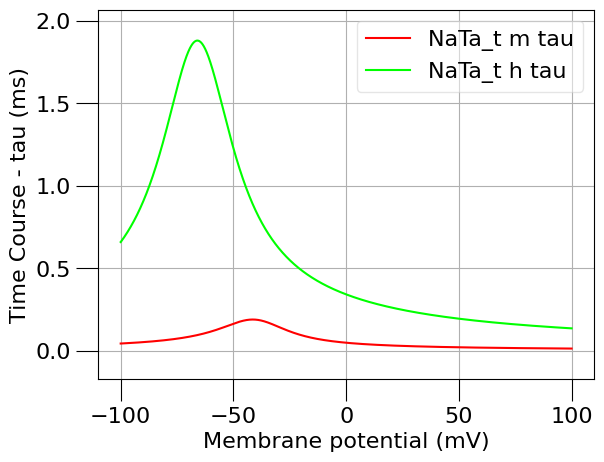

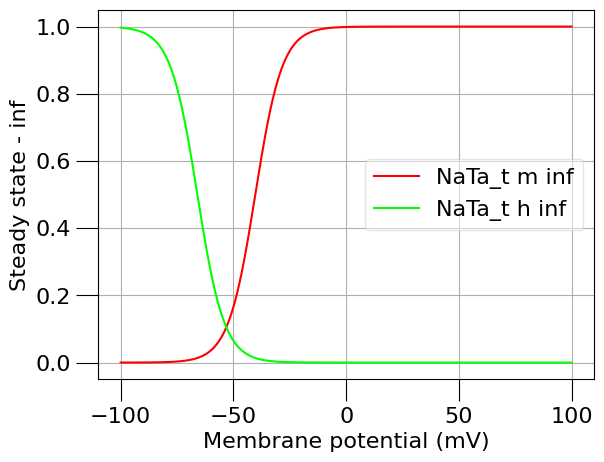

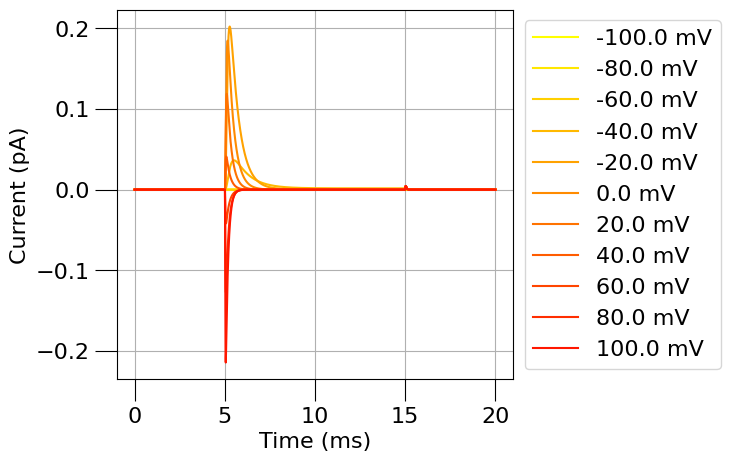

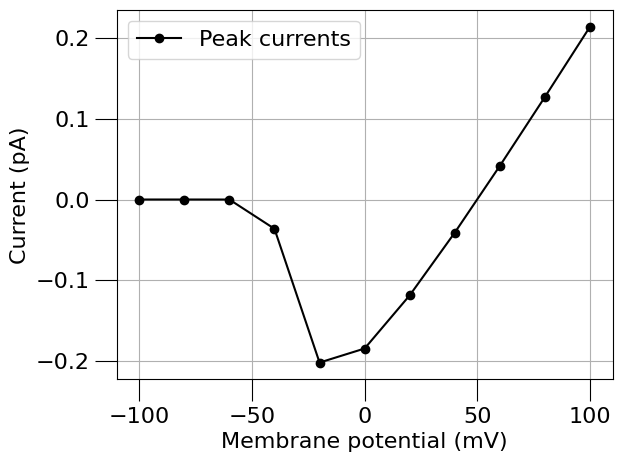

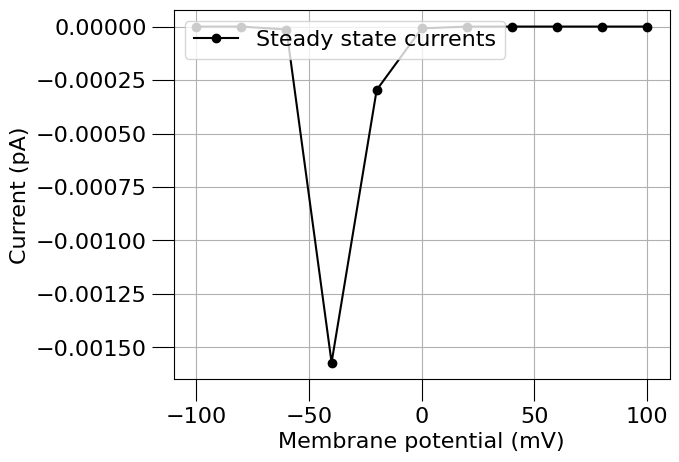

In [4]:
from pyneuroml.analysis.NML2ChannelAnalysis import run

na_erev = 50 # mV
run(channel_files=[na_chan_fname], ivCurve=True, erev=na_erev, clampDelay=5, clampDuration=10, duration=20)


### 1.4) Find a Potassium channel

In [5]:
data = search_neuromldb("Fast Potassium", 'channel')

NMLCH000113: K Fast Noninactivating Potassium, Rettig Wunder 1992
NMLCH001627: KDr Fast Delayed Rectifier Potassium , Bezaire Raikov 2016
NMLCH001611: KDr Fast Delayed Rectifier Potassium, Bezaire Raikov 2016
NMLCH001609: KDr Fast Delayed Rectifier Potassium , Bezaire Raikov 2016
NMLCH001549: K Fast Potassium, Boyle Cohen 2008
NMLCH001529: KT Fast Inactivating Potassium, Gouwens Berg 2018
NMLCH001465: K Fast Noninactivating Potassium, Gouwens Berg 2018
NMLCH001400: KTst Fast Inactivating Potassium, Hay Hill 2011
NMLCH001394: K Fast Noninactivating Potassium, Hay Hill 2011
NMLCH000156: IM M Type Potassium, Traub Buhl 2003
NMLCH000155: KDr Delayed Rectifier Potassium, Traub Buhl 2003
NMLCH000154: KDr Delayed Rectifier Potassium Channel for Fast Spiking (FS) Interneurons, Traub Contreras 2005
NMLCH000153: KCa BK Type Fast Calcium Dependent Potassium, Traub Buhl 2003
NMLCH000152: KCa BK Type Fast Calcium Dependent Potassium, Traub Buhl 2003
NMLCH000151: KCa AHP Type Calcium Dependent Potas

pyNeuroML >>> INFO - Loading NeuroML2 file: NMLCH000113.channel.nml
pyNeuroML >>> INFO - Loading NeuroML2 file: SKv3_1.channel.nml
pyNeuroML >>> INFO - Loading NeuroML2 file: SKv3_1.channel.nml
pyNeuroML >>> INFO - Loading NeuroML2 file: SKv3_1.channel.nml
pyNeuroML >>> INFO - Loading LEMS file: /Users/padraig/git/Documentation/source/Userdocs/NML2_examples/LEMS_Test_SKv3_1.xml and running with jNeuroML
pyNeuroML >>> INFO - Executing: (java -Xmx400M  -Djava.awt.headless=true -jar  "/opt/homebrew/anaconda3/envs/py39n/lib/python3.9/site-packages/pyneuroml/lib/jNeuroML-0.13.0-jar-with-dependencies.jar"  /Users/padraig/git/Documentation/source/Userdocs/NML2_examples/LEMS_Test_SKv3_1.xml  -nogui -I '') in directory: .


Channel SKv3_1 (in file SKv3_1.channel.nml) has notes: Fast, non inactivating K+ current
            
Comment from original mod file: 
:Reference : :		Characterization of a Shaw-related potassium channel family in rat brain, The EMBO Journal, vol.11, no.7,2473-2486 (1992)


pyNeuroML >>> INFO - Command completed successfully!


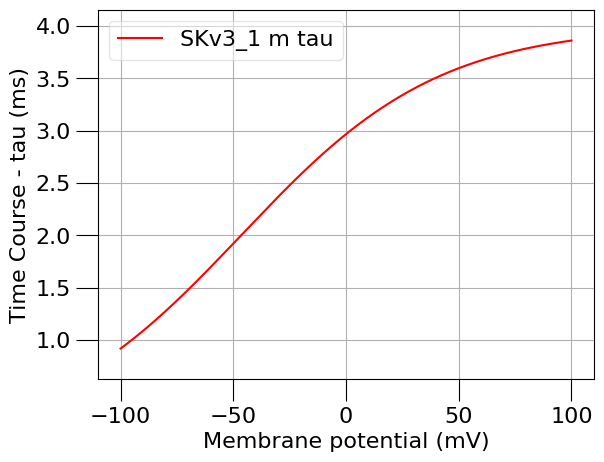

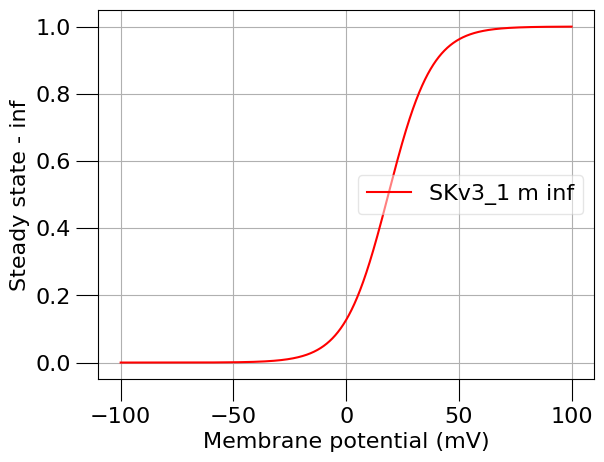

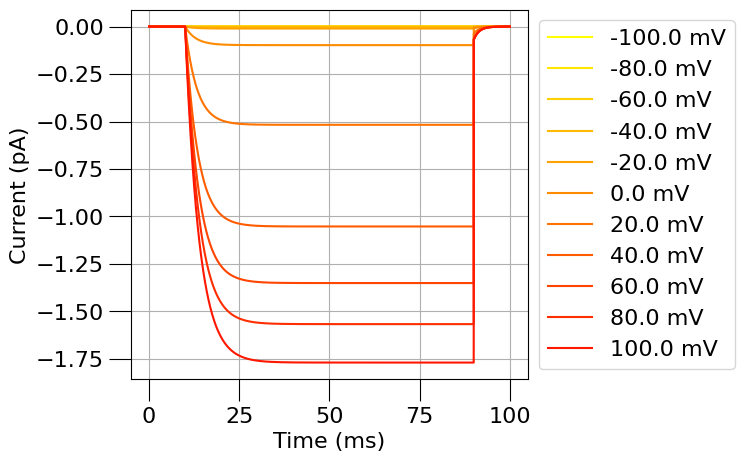

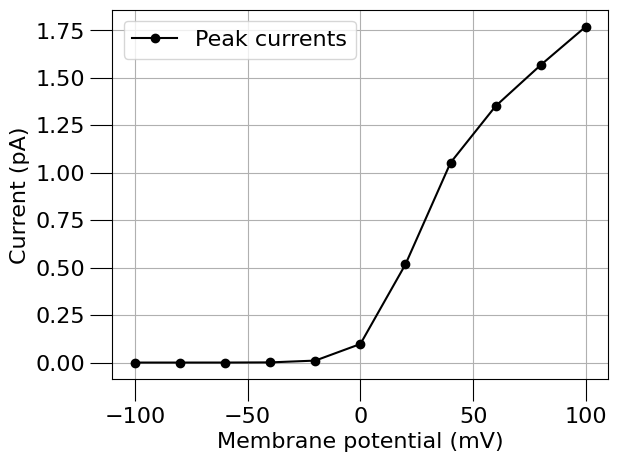

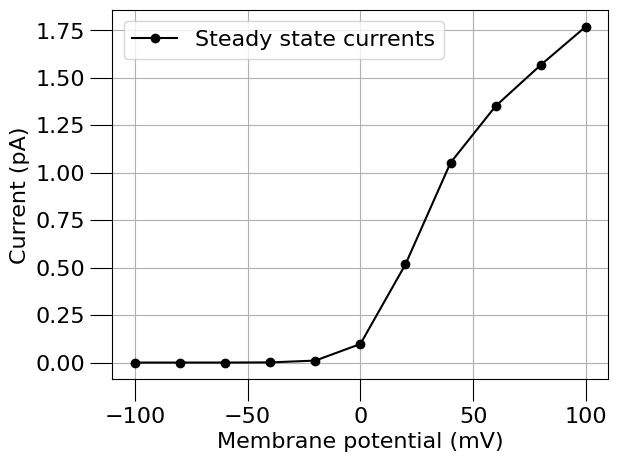

In [6]:
# Download one of these

k_chan_doc, k_chan_fname_orig = get_model_from_neuromldb('NMLCH000113', 'channel')

k_chan = k_chan_doc.ion_channel[0] # select the first ion channel in the nml doc

k_chan_fname = '%s.channel.nml'%k_chan.id
os.rename(k_chan_fname_orig, k_chan_fname) # Rename for clarity

print('Channel %s (in file %s) has notes: %s'%(k_chan.id, k_chan_fname, k_chan.notes))

k_erev = -77
run(channel_files=[k_chan_fname], ivCurve=True, erev=k_erev)


### 1.5)  Find a passive (leak) current


In [7]:
data = search_neuromldb("Leak", 'channel')

pas_chan_doc, pas_chan_fname = get_model_from_neuromldb(data[0]['Model_ID'], 'channel')
pas_chan = pas_chan_doc.ion_channel[0] # select the first ion channel in the nml doc

print('Channel %s has notes: %s'%(pas_chan.id, pas_chan.notes))

NMLCH000015: Passive Leak, Maex De Schutter 1998
NMLCH001623: Passive Leak, Bezaire Raikov 2016
NMLCH001601: Passive Leak, Smith Smith 2013
NMLCH001590: Passive Leak, Prinz Bucher 2004
NMLCH001545: Passive Leak, Boyle Cohen 2008
NMLCH001471: Passive Leak, Gouwens Berg 2018
NMLCH001427: Passive Leak, Hodgkin Huxley 1952
NMLCH001403: Passive Leak, Hay Hill 2011
NMLCH000172: Passive Leak, Traub Contreras 2005
NMLCH000130: Passive Leak, Pospischil Toledo-Rodriguez 2008
NMLCH000114: Passive Leak, Hodgkin Huxley 1952
NMLCH000095: Passive Leak, Vervaeke Lorincz 2010
NMLCH000027: Passive Leak, De Schutter Bower 1994
NMLCH000024: Passive Leak, Maex De Schutter 1998
NMLCH000016: Passive Leak, Maex De Schutter 1998
NMLCH000007: Passive Leak, Migliore Ferrante 2005
NMLCH000139: Passive Leak, Hodgkin Huxley 1952


pyNeuroML >>> INFO - Loading NeuroML2 file: NMLCH000015.channel.nml


Channel GranPassiveCond has notes: Simple leak conductance for Granule cell


## 2) Create a new cell model using these channels

### 2.1) Create the Cell object, add channels and save to file

In [8]:
from neuroml import *
from neuroml.utils import component_factory
import neuroml.writers as writers


nml_doc = NeuroMLDocument(id="TestCell")

cell = component_factory("Cell", id="novel_cell")
nml_doc.add(cell)

cell.add_segment(prox=[0,0,0,17.841242], 
                 dist=[0,0,0,17.841242], 
                 seg_type='soma')

cell.set_resistivity('0.03 kohm_cm')
cell.set_init_memb_potential('-65mV')
cell.set_specific_capacitance('1.0 uF_per_cm2')
cell.set_spike_thresh('0mV')


cell.add_channel_density(nml_doc,
                        cd_id='%s_chans'%na_chan.id,
                        ion_channel=na_chan.id,
                        cond_density='150 mS_per_cm2',
                        ion_chan_def_file=na_chan_fname,
                        erev="%s mV"%na_erev)

cell.add_channel_density(nml_doc,
                        cd_id='%s_chans'%k_chan.id,
                        ion_channel=k_chan.id,
                        cond_density='36 mS_per_cm2',
                        ion_chan_def_file=k_chan_fname,
                        erev="%s mV"%k_erev)

cell.add_channel_density(nml_doc,
                        cd_id='%s_chans'%pas_chan.id,
                        ion_channel=pas_chan.id,
                        cond_density='0.3 mS_per_cm2',
                        ion_chan_def_file=pas_chan_fname,
                        erev="-65 mV")



cell_file = "%s.cell.nml"%nml_doc.id
writers.NeuroMLWriter.write(nml_doc, cell_file)


print("Written cell file to: " + cell_file)

from neuroml.utils import validate_neuroml2

validate_neuroml2(cell_file)

#!cat TestCell.cell.nml


pynml.summary(nml_doc, verbose=True)

Written cell file to: TestCell.cell.nml
It's valid!
*******************************************************
* NeuroMLDocument: TestCell
*
*
*  Cell: novel_cell
*    <Segment|0|Seg0>
*      Parent segment: None (root segment)
*      (0.0, 0.0, 0.0), diam 17.841242um -> (0.0, 0.0, 0.0), diam 17.841242um; seg length: 0.0 um
*      Surface area: 1000.0000939925986 um2, volume: 2973.540612824116 um3
*    Total length of 1 segment: 0.0 um; total area: 1000.0000939925986 um2
*  
*    SegmentGroup: soma_group,	1 member(s),	0 included group(s);	contains 1 segment, id: 0
*    SegmentGroup: all,	1 member(s),	0 included group(s);	contains 1 segment, id: 0
*  
*    Channel density: NaTa_t_chans on all;	conductance of 150 mS_per_cm2 through ion chan NaTa_t with ion non_specific, erev: 50 mV
*      Channel is on <Segment|0|Seg0>,	total conductance: 1500.0 S_per_m2 x 1.0000000939925986e-09 m2 = 1.500000140988898e-06 S (1500000.140988898 pS)
*    Channel density: SKv3_1_chans on all;	conductance of 36 

/opt/homebrew/anaconda3/envs/py39n/lib/python3.9/site-packages/neuroml/nml/generatedssupersuper.py:176: UserWarning: morphology has already been assigned.  Use `force=True` to overwrite. Hint: you can make changes to the already added object as required without needing to re-add it because only references to the objects are added, not their values.
  warnings.warn(
/opt/homebrew/anaconda3/envs/py39n/lib/python3.9/site-packages/neuroml/nml/generatedssupersuper.py:176: UserWarning: biophysical_properties has already been assigned.  Use `force=True` to overwrite. Hint: you can make changes to the already added object as required without needing to re-add it because only references to the objects are added, not their values.
  warnings.warn(
/opt/homebrew/anaconda3/envs/py39n/lib/python3.9/site-packages/neuroml/nml/generatedssupersuper.py:176: UserWarning: intracellular_properties has already been assigned.  Use `force=True` to overwrite. Hint: you can make changes to the already added obj

### 2.2) Generate a plot of the activity of the cell under current clamp input

pyNeuroML >>> INFO - Loading NeuroML2 file: /Users/padraig/git/Documentation/source/Userdocs/NML2_examples/TestCell.cell.nml
pyNeuroML >>> INFO - Loading NeuroML2 file: /Users/padraig/git/Documentation/source/Userdocs/NML2_examples/NaTa_t.channel.nml
pyNeuroML >>> INFO - Loading NeuroML2 file: /Users/padraig/git/Documentation/source/Userdocs/NML2_examples/SKv3_1.channel.nml
pyNeuroML >>> INFO - Loading NeuroML2 file: /Users/padraig/git/Documentation/source/Userdocs/NML2_examples/NMLCH000015.channel.nml
pyNeuroML >>> INFO - Executing: (java -Xmx400M  -jar  "/opt/homebrew/anaconda3/envs/py39n/lib/python3.9/site-packages/pyneuroml/lib/jNeuroML-0.13.0-jar-with-dependencies.jar" -validate iv_novel_cell.net.nml ) in directory: .
pyNeuroML >>> INFO - Command completed successfully!
pyNeuroML >>> INFO - Loading NeuroML2 file: /Users/padraig/git/Documentation/source/Userdocs/NML2_examples/iv_novel_cell.net.nml
pyNeuroML >>> INFO - Loading NeuroML2 file: /Users/padraig/git/Documentation/source/U

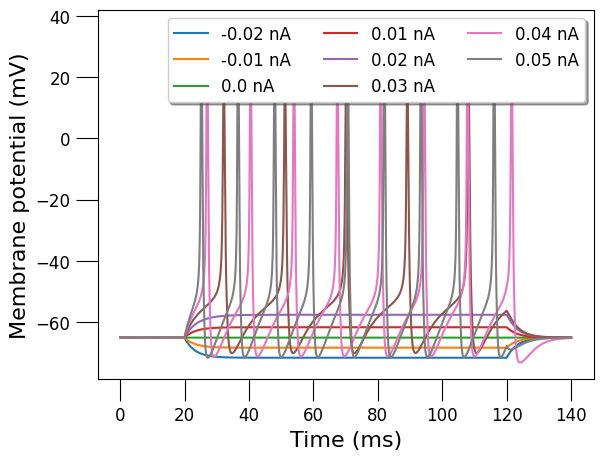

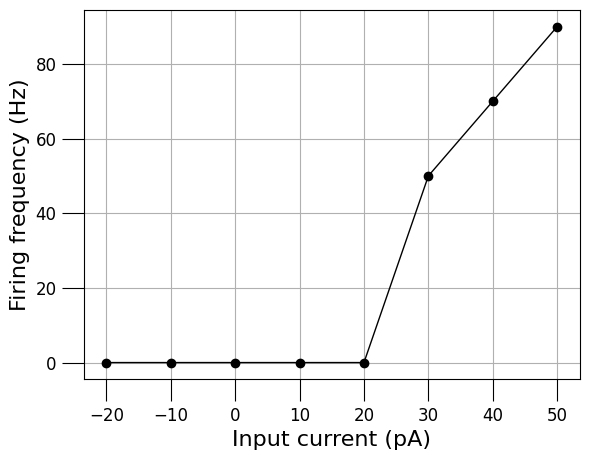

{-0.02: 0.0,
 -0.01: 0.0,
 0.0: 0.0,
 0.01: 0.0,
 0.02: 0.0,
 0.03: 50.0,
 0.04: 70.0,
 0.05: 90.0}

In [9]:
from pyneuroml.analysis import generate_current_vs_frequency_curve

generate_current_vs_frequency_curve(cell_file,
    cell.id,
    start_amp_nA=-0.02,
    end_amp_nA=0.06,
    step_nA=0.01,
    pre_zero_pulse=20,
    post_zero_pulse=20,
    analysis_duration=100,
    temperature='34degC',
    plot_voltage_traces=True)


## 3) Search for, download and analyse a complete NeuroML cell

### 3.1) Search for and download the cell


In [10]:
data = search_neuromldb("Burst Accommodating Martinotti", 'cell')

NMLCL000109: Layer 2/3 Burst Accommodating Martinotti Cell (3), Markram Muller 2015
NMLCL000395: Layer 6 Burst Non-accommodating Martinotti Cell (4), Markram Muller 2015
NMLCL000393: Layer 6 Burst Non-accommodating Martinotti Cell (2), Markram Muller 2015
NMLCL000345: Layer 4 Burst Non-accommodating Martinotti Cell (4), Markram Muller 2015
NMLCL000343: Layer 4 Burst Non-accommodating Martinotti Cell (2), Markram Muller 2015
NMLCL000315: Layer 2/3 Burst Non-accommodating Martinotti Cell (4), Markram Muller 2015
NMLCL000313: Layer 2/3 Burst Non-accommodating Martinotti Cell (2), Markram Muller 2015
NMLCL000191: Layer 6 Burst Accommodating Martinotti Cell (5), Markram Muller 2015
NMLCL000190: Layer 6 Burst Accommodating Martinotti Cell (4), Markram Muller 2015
NMLCL000188: Layer 6 Burst Accommodating Martinotti Cell (2), Markram Muller 2015
NMLCL000161: Layer 5 Burst Accommodating Martinotti Cell (5), Markram Muller 2015
NMLCL000160: Layer 5 Burst Accommodating Martinotti Cell (4), Markra

In [11]:
model_id = 'NMLCL000109'

def get_model_details_from_neuromldb(model_id):

    url = 'https://neuroml-db.org/api/model?id=%s'%model_id
    
    with urllib.request.urlopen(url) as res:
        model_details = json.load(res)
        
    for k in model_details['model']: print('%s:\t%s'%(k,model_details['model'][k]))
        
    return model_details
    

model_details = get_model_details_from_neuromldb(model_id)


Model_ID:	NMLCL000109
Status:	CURRENT
Errors:	None
Status_Timestamp:	2018-12-24T16:29:21+00:00
Type:	Cell
Equations:	2061
Runtime_Per_Step:	0.000510815108024267
Max_Stable_DT:	0.0625
Max_Stable_DT_Error:	0.969373115260111
Max_Stable_DT_Benchmark_RunTime:	4.903825037032964
Optimal_DT:	0.00781557069252977
Optimal_DT_Error:	0.122802372280653
Optimal_DT_Benchmark_RunTime:	39.21518682026722
Optimal_DT_a:	0.000968992248062015
Optimal_DT_b:	15.8634962901345
Optimal_DT_c:	-0.0136485748710791
CVODE_baseline_step_frequency:	13111.7719061286
CVODE_steps_per_spike:	766.973690134512
CVODE_Benchmark_RunTime:	10.615508666396945
Name:	Layer 2/3 Burst Accommodating Martinotti Cell (3)
Directory_Path:	/var/www/NeuroMLmodels/NMLCL000109
File_Name:	bAC217_L23_MC_40be3bf0e8_0_0.cell.nml
File_Updated:	None
File_MD5_Checksum:	bcf74ccd8c6840f6c8f7551084c989b7
File:	/var/www/NeuroMLmodels/NMLCL000109/bAC217_L23_MC_40be3bf0e8_0_0.cell.nml
Publication_ID:	6000246
Upload_Time:	2016-12-14T14:29:41+00:00
Notes:	Non

In [12]:
def get_full_model_from_neuromldb(model_id):
    
    fname = '%s.nml.zip'%(model_id)

    url = 'https://neuroml-db.org/GetModelZip?modelID=%s&version=NeuroML'%model_id
    r = requests.get(url)
    with open(fname , 'wb') as f:
        f.write(r.content)
    

    import zipfile
    with zipfile.ZipFile(fname, 'r') as z:
        z.extractall('.')

    
    print('Saved as %s'%fname)
    
get_full_model_from_neuromldb(model_id)

detailed_cell_file = model_details['model']['File_Name']

validate_neuroml2(detailed_cell_file)


Saved as NMLCL000109.nml.zip
It's valid!


### 3.2) Generate 3D views of the cell

pyNeuroML >>> INFO - Loading NeuroML2 file: bAC217_L23_MC_40be3bf0e8_0_0.cell.nml
pyNeuroML >>> INFO - Loading NeuroML2 file: bAC217_L23_MC_40be3bf0e8_0_0.cell.nml
pyNeuroML >>> INFO - Loading NeuroML2 file: bAC217_L23_MC_40be3bf0e8_0_0.cell.nml
pyNeuroML >>> INFO - Loading NeuroML2 file: bAC217_L23_MC_40be3bf0e8_0_0.cell.nml


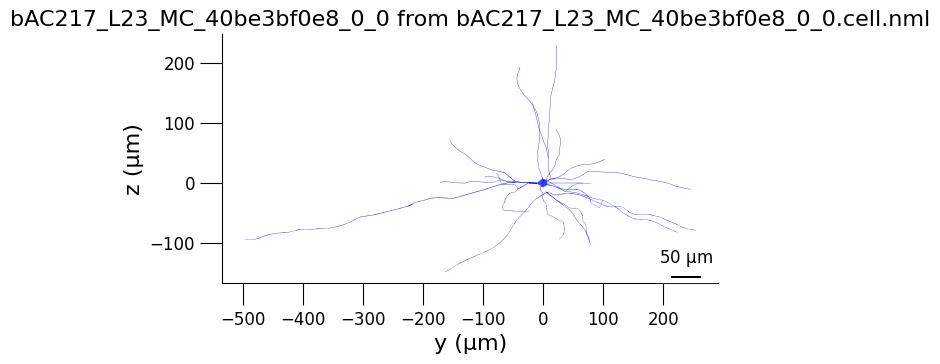

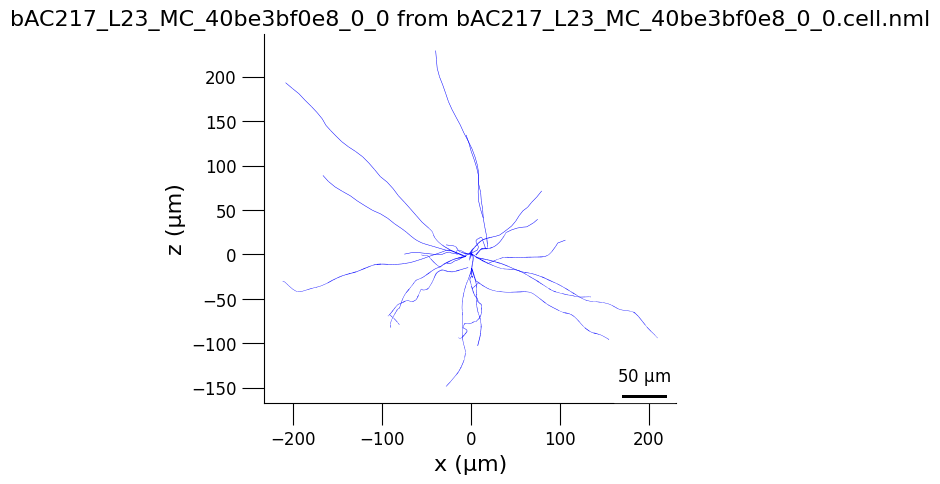

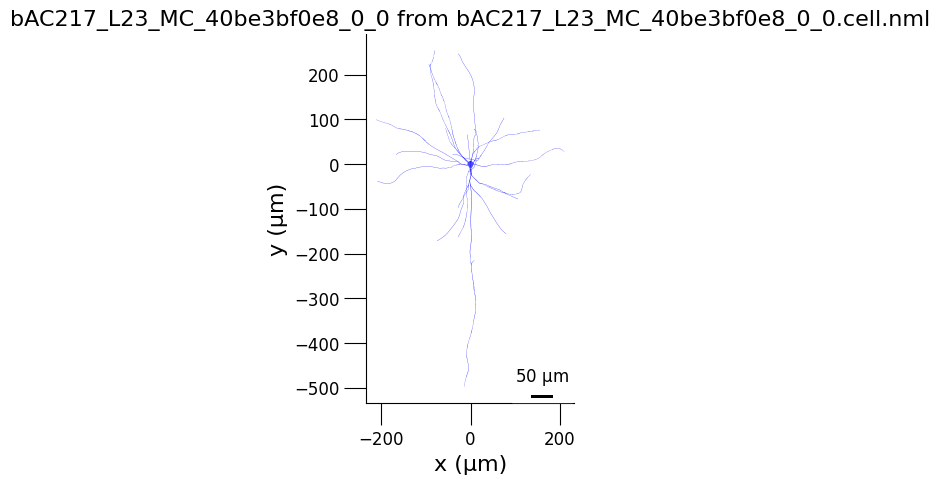

In [13]:

from pyneuroml.plot.PlotMorphology import plot_2D

planes = ['yz', 'xz', 'xy']
for plane in planes:

    plot_2D(detailed_cell_file,
            plane2d  = plane,
            min_width = 0,
            verbose= False,
            nogui = True,
            square=False)

detailed_cell_doc = pynml.read_neuroml2_file(detailed_cell_file)
detailed_cell = detailed_cell_doc.cells[0]


### 3.3) Analyse cell spiking behaviour

pyNeuroML >>> INFO - Loading NeuroML2 file: /Users/padraig/git/Documentation/source/Userdocs/NML2_examples/bAC217_L23_MC_40be3bf0e8_0_0.cell.nml
pyNeuroML >>> INFO - Loading NeuroML2 file: /Users/padraig/git/Documentation/source/Userdocs/NML2_examples/K_Tst.channel.nml
pyNeuroML >>> INFO - Loading NeuroML2 file: /Users/padraig/git/Documentation/source/Userdocs/NML2_examples/SKv3_1.channel.nml
pyNeuroML >>> INFO - Loading NeuroML2 file: /Users/padraig/git/Documentation/source/Userdocs/NML2_examples/Nap_Et2.channel.nml
pyNeuroML >>> INFO - Loading NeuroML2 file: /Users/padraig/git/Documentation/source/Userdocs/NML2_examples/NaTs2_t.channel.nml
pyNeuroML >>> INFO - Loading NeuroML2 file: /Users/padraig/git/Documentation/source/Userdocs/NML2_examples/Ih.channel.nml
pyNeuroML >>> INFO - Loading NeuroML2 file: /Users/padraig/git/Documentation/source/Userdocs/NML2_examples/pas.channel.nml
pyNeuroML >>> INFO - Loading NeuroML2 file: /Users/padraig/git/Documentation/source/Userdocs/NML2_example

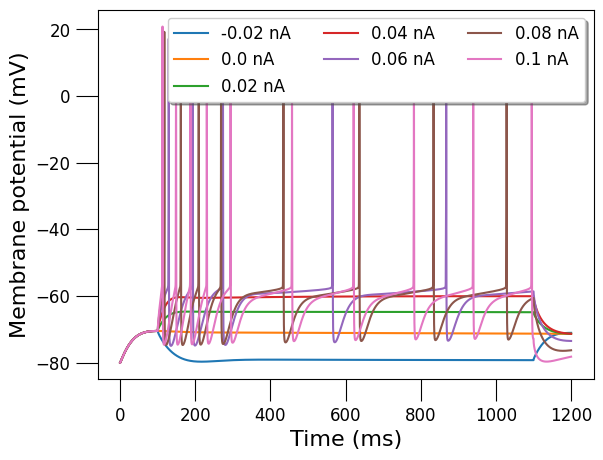

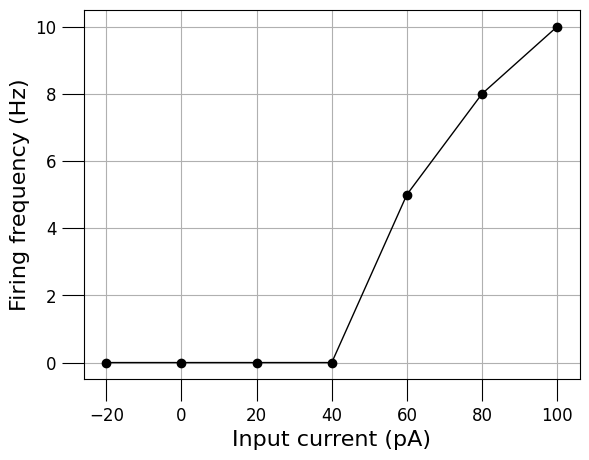

{-0.02: 0.0, 0.0: 0.0, 0.02: 0.0, 0.04: 0.0, 0.06: 5.0, 0.08: 8.0, 0.1: 10.0}

In [14]:
martinotti_cell = detailed_cell_doc.cells[0]

generate_current_vs_frequency_curve(detailed_cell_file,
    martinotti_cell.id,
    start_amp_nA=-0.02,
    end_amp_nA=0.1,
    step_nA=0.02,
    pre_zero_pulse=100,
    post_zero_pulse=100,
    analysis_duration=1000,
    plot_voltage_traces=True,
    simulator='jNeuroML_NEURON')

## 4) Create a small network using the cells

### 4.1) Generate the NeuroML network


In [15]:

from neuroml.utils import component_factory
from pyneuroml import pynml
from pyneuroml.lems import LEMSSimulation
import neuroml.writers as writers
import random

nml_doc = component_factory("NeuroMLDocument", id="NML_DB_Net")


### Create the network
net = nml_doc.add("Network", id="NML_DB_Net", validate=False)
net.type="networkWithTemperature" 
net.temperature="34.0degC"

### Add a synapse
syn0 = nml_doc.add(
    "ExpOneSynapse", id="syn0", gbase="65nS", erev="0mV", tau_decay="3ms"
)


## Create the first population
size_exc = 4
nml_doc.add("IncludeType", href=cell_file)

pop_exc = component_factory("Population", id="Exc", component=cell.id, size=size_exc, type="population")
# Set optional color property. Note: used later when generating plots
##pop0.add("Property", tag="color", value="0 0 .8")
net.add(pop_exc)

## Create the second population
size_inh = 4
nml_doc.add("IncludeType", href=detailed_cell_file)

pop_inh = component_factory("Population", id="Inh", component=detailed_cell.id, size=size_inh, type="population")
# Set optional color property. Note: used later when generating plots
##pop1.add("Property", tag="color", value="0 0 .8")
net.add(pop_inh)

## Create connections and inputs
random.seed(123)
prob_connection = 0.8

proj_count = 0

projection = Projection(
                    id="Proj_exc_inh",
                    presynaptic_population=pop_exc.id,
                    postsynaptic_population=pop_inh.id,
                    synapse=syn0.id,
                )

net.projections.append(projection)

for i in range(0, size_exc):
    for j in range(0, size_inh):
        if random.random() <= prob_connection: # probabilistic connection...
            connection = ConnectionWD(
                id=proj_count,
                pre_cell_id="%s[%i]" % (pop_exc.id, i),
                post_cell_id="%s[%i]" % (pop_inh.id, j),
                weight=random.random(),
                delay='0ms'
            )
            projection.add(connection)
            proj_count += 1

for i in range(0, size_exc):
    # pulse generator as explicit stimulus
    pg = nml_doc.add(
        "PulseGenerator",
        id="pg_exc_%i" % i,
        delay="20ms",
        duration="260ms",
        amplitude="%f nA" % (0.03 + 0.01 * random.random()),
    )
    
    exp_input = net.add(
        "ExplicitInput", target="%s[%i]" % (pop_exc.id, i), input=pg.id
    )

for i in range(0, size_inh):
    # pulse generator as explicit stimulus
    pg = nml_doc.add(
        "PulseGenerator",
        id="pg_inh_%i"%i,
        delay="20ms",
        duration="260ms",
        amplitude="%f nA" % (0.02 + 0.02 * random.random()),
    )
    
    exp_input = net.add(
        "ExplicitInput", target="%s[%i]" % (pop_inh.id, i), input=pg.id
    )


print(nml_doc.summary())

nml_net_file = 'NML_DB_network.net.nml'
writers.NeuroMLWriter.write(nml_doc, nml_net_file)

print("Written network file to: " + nml_net_file)
pynml.validate_neuroml2(nml_net_file)

pyNeuroML >>> INFO - Executing: (java -Xmx400M  -jar  "/opt/homebrew/anaconda3/envs/py39n/lib/python3.9/site-packages/pyneuroml/lib/jNeuroML-0.13.0-jar-with-dependencies.jar" -validate NML_DB_network.net.nml ) in directory: .


*******************************************************
* NeuroMLDocument: NML_DB_Net
*
*  ExpOneSynapse: ['syn0']
*  IncludeType: ['TestCell.cell.nml', 'bAC217_L23_MC_40be3bf0e8_0_0.cell.nml']
*  PulseGenerator: ['pg_exc_0', 'pg_exc_1', 'pg_exc_2', 'pg_exc_3', 'pg_inh_0', 'pg_inh_1', 'pg_inh_2', 'pg_inh_3']
*
*  Network: NML_DB_Net (temperature: 34.0degC)
*
*   8 cells in 2 populations 
*     Population: Exc with 4 components of type novel_cell
*     Population: Inh with 4 components of type bAC217_L23_MC_40be3bf0e8_0_0
*
*   13 connections in 1 projections 
*     Projection: Proj_exc_inh from Exc to Inh, synapse: syn0
*       13 connections (wd): [(Connection 0: 0 -> 0, weight: 0.087187, delay: 0.00000 ms), ...]
*
*   0 inputs in 0 input lists 
*
*   8 explicit inputs (outside of input lists)
*     Explicit Input of type pg_exc_0 to Exc(cell 0), destination: unspecified
*     Explicit Input of type pg_exc_1 to Exc(cell 1), destination: unspecified
*     Explicit Input of type pg_exc_

pyNeuroML >>> INFO - Command completed successfully!
pyNeuroML >>> INFO - Output: 
  jNeuroML >>   jNeuroML v0.13.0
  jNeuroML >>  Validating: /Users/padraig/git/Documentation/source/Userdocs/NML2_examples/NML_DB_network.net.nml
  jNeuroML >>  Valid against schema and all tests
  jNeuroML >>  No warnings
  jNeuroML >>  
  jNeuroML >>  Validated 1 files: All valid and no warnings
  jNeuroML >>  
  jNeuroML >>  


True

### 4.2) Generate views of the network 

pyNeuroML >>> INFO - Converting NML_DB_network.net.nml to graphical form, level -1, engine dot


neuromllite >>> Initiating GraphViz handler, level -1, engine: dot, seed: 1234
Parsing: NML_DB_network.net.nml
Loaded: NML_DB_network.net.nml as NeuroMLDocument
neuromllite >>> Document: NML_DB_Net
neuromllite >>> Network: NML_DB_Net
neuromllite >>> Population: Exc, component: novel_cell (Cell), size: 4 cells, properties: {}
neuromllite >>> Population: Inh, component: bAC217_L23_MC_40be3bf0e8_0_0 (Cell), size: 4 cells, properties: {}
neuromllite >>> GRAPH PROJ: Proj_exc_inh (Exc (4) -> Inh (4), projection): w 1.0; wtot: 4.849021209484878; sign: 1; cond: 65.0 nS (65nS); all: {'projection': 58.85091239849243, 'inhibitory': -1e+100, 'excitatory': -1e+100, 'electricalProjection': -1e+100, 'continuousProjection': -1e+100} -> {'projection': 1.380338363104285, 'inhibitory': 1e+100, 'excitatory': 1e+100, 'electricalProjection': 1e+100, 'continuousProjection': 1e+100}
neuromllite >>>  - conn Exc_0 -> Inh_0: 5.66713403897108 (5.66713403897108)
neuromllite >>>  - conn Exc_0 -> Inh_1: 7.0005152709

/opt/homebrew/anaconda3/envs/py39n/lib/python3.9/subprocess.py:1052: ResourceWarning: subprocess 25497 is still running
  _warn("subprocess %s is still running" % self.pid,
pyNeuroML >>> INFO - Done with GraphViz...


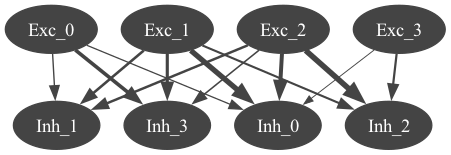

In [16]:
from pyneuroml.pynml import generate_nmlgraph

generate_nmlgraph(nml_net_file, level=-1, engine="dot")

from IPython.display import Image
Image(filename='%s.gv.png'%net.id,width=500)

### 4.3) Generate LEMS file to simulate the network

See documentation about [LEMS Simulation files](https://docs.neuroml.org/Userdocs/LEMSSimulation.html).

In [17]:
simulation_id = "NML_DB_network_sim"
simulation = LEMSSimulation(sim_id=simulation_id,
                            duration=300, dt=0.025, simulation_seed=123)
simulation.assign_simulation_target(net.id)
simulation.include_neuroml2_file(nml_net_file, include_included=False)


pops = [pop_exc, pop_inh]

for pop in pops:
    simulation.create_event_output_file(
        f"{pop.id}_spikes", f"{pop.id}.spikes", format='ID_TIME'
    )
    simulation.create_output_file(pop.id, "%s.v.dat" % pop.id)

    for pre in range(0, pop.size):
        next_cell = '{}[{}]'.format(pop.id,pre)
        simulation.add_selection_to_event_output_file(
            f"{pop.id}_spikes", pop.component, next_cell, 'spike')

        simulation.add_column_to_output_file(pop.id, f"v{pre}", f"{next_cell}/v")
    
    
lems_simulation_file = simulation.save_to_file()

print(f"Saved LEMS Simulation file to: {lems_simulation_file}")

Saved LEMS Simulation file to: LEMS_NML_DB_network_sim.xml


### 4.4) Run simulation of the network using NEURON

pyNeuroML >>> INFO - Loading LEMS file: LEMS_NML_DB_network_sim.xml and running with jNeuroML_NEURON
pyNeuroML >>> INFO - Executing: (java -Xmx2G  -Djava.awt.headless=true -jar  "/opt/homebrew/anaconda3/envs/py39n/lib/python3.9/site-packages/pyneuroml/lib/jNeuroML-0.13.0-jar-with-dependencies.jar"  LEMS_NML_DB_network_sim.xml  -neuron -run -compile -nogui -I '') in directory: .
pyNeuroML >>> INFO - Command completed successfully!
pyNeuroML >>> WARNING - Reloading: Data loaded from ./Exc.v.dat (jNeuroML_NEURON)
pyNeuroML >>> WARNING - Reloading: Data loaded from ./Inh.v.dat (jNeuroML_NEURON)


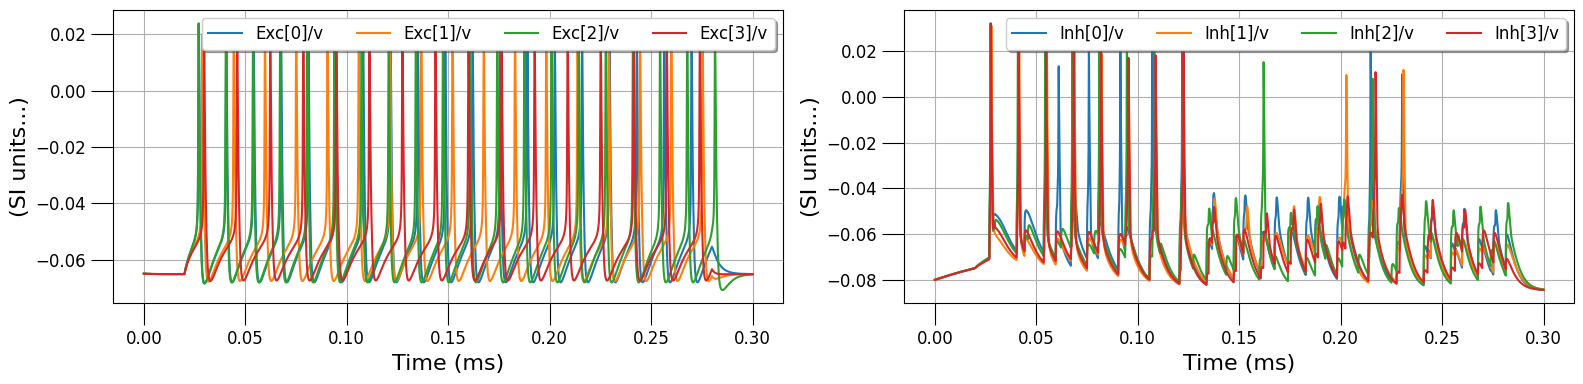

In [18]:
traces = pynml.run_lems_with_jneuroml_neuron(
    lems_simulation_file, max_memory="2G", nogui=True, load_saved_data=True, plot=True
)